## Problem Statement

You work for a fitness company and have gathered data on the fitness activities of 50 individuals using fitness trackers. The dataset is stored in an Excel file named "fitness_data.xlsx" and includes the following columns:

- **name:** Name of the person.
- **steps_taken:** The number of steps taken by individuals.
- **calories_burned:** The estimated calories burned by individuals.
- **sleep_duration(hours):** The number of hours of sleep individuals got on that day.
- **water_intake(ounces):** The amount of water individuals consumed.


**Import Necessary Libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Task1

1. Import the data from the "fitness_data.xlsx" Excel file.
2. Display the first few rows of the dataset to get an overview.
3. Calculate and display basic statistics (mean, median, min, max) for each column.


In [2]:
df = pd.read_excel('fitness_data.xlsx')
df.head()

,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
0,Akshay,10500,4500,7.5,80
1,Priya,9800,4200,7.2,75
2,Raj,11500,4800,7.0,90
3,Emily,12000,5000,7.8,85
4,Rohit,8900,4000,7.0,70


In [3]:
df.describe()

,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
count,50.000000,50.000000,50.000000,50.000000
mean,10316.000000,4418.000000,7.396000,79.600000
std,1177.052701,370.708092,1.660951,14.457538
min,8000.000000,3700.000000,4.000000,30.000000
25%,9625.000000,4200.000000,7.000000,70.000000
50%,10250.000000,4400.000000,7.200000,80.000000
75%,11000.000000,4700.000000,7.500000,90.000000
max,15000.000000,5500.000000,18.000000,100.000000


## Task2:  Range and IQR

1. Calculate the range of "steps_taken".
2. Calculate the range of "calories_burned".
3. Calculate the Interquartile Range (IQR) for "sleep_duration(hours)".
4. Calculate the IQR for "water_intake(ounces)".

In [4]:
# Calculate the range of "steps_taken" for the entire week
range_steps = df['steps_taken'].max() - df['steps_taken'].min()
print(f"Range of steps taken : {range_steps}")

# Calculate the range of "calories_burned" for the entire week
range_calorie_burnt = df['calories_burned'].max() - df['calories_burned'].min()
print(f"Range calories_burned : {range_calorie_burnt}")

# Calculate the Interquartile Range (IQR) for "sleep_duration(hours)"
q1,q3 = df['sleep_duration(hours)'].quantile([0.25,0.75])
print(f"Inter Quartile Range : {q3-q1}")

# Calculate the IQR for "water_intake(ounces)"
q1,q3 = df['water_intake(ounces)'].quantile([0.25,0.75])
print(f"Inter Quartile Range : {q3-q1}")

# Print the results


Range of steps taken : 7000
Range calories_burned : 1800
Inter Quartile Range : 0.5
Inter Quartile Range : 20.0


## Task3: Box Plot for Steps Taken

- Create a box plot for the "steps_taken" column to visualize the distribution of daily steps taken by individuals. Interpret the box plot and identify any outliers.

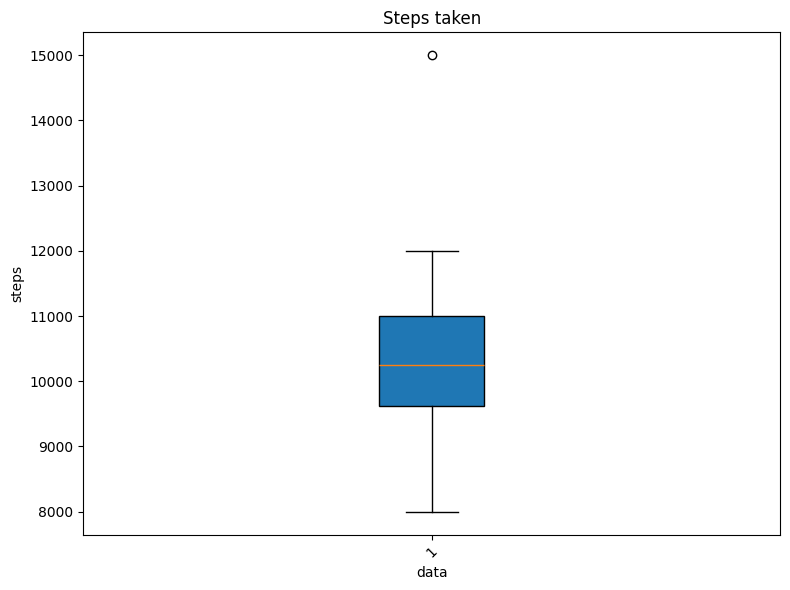

In [7]:

# df_steps = df['steps_taken']
# Set the figure size
plt.figure(figsize=(8,6))

# Create a box plot for "Steps Taken"
plt.boxplot(df['steps_taken'],vert=True, patch_artist=True)

# Set the title and labels
plt.title('Steps taken')
plt.ylabel('steps')
plt.xlabel('data')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Ensure proper layout and display the plot
plt.tight_layout()

#### Observations

- Most individuals appear to have a median daily step count around 10,000 as indicated by the orange line within the box.
- The presence of an outlier at 15,000 indicates that there is at least one individual who took an exceptionally high number of steps. This could be due to various reasons, such as an unusually active day or a measurement error.


## Task4: 

- Use the IQR method to identify and label outliers in the "sleep_duration(hours)" column.

In [8]:
#defininig the function
def upper_lower_limit():
    q1,q3 = q1,q3 = df['sleep_duration(hours)'].quantile([0.25,0.75])
    iqr = q3-q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    return upper,lower


In [10]:
#get the lower and upper limits
upper , lower = upper_lower_limit()

In [12]:
# Identify and label outliers
df[(df['sleep_duration(hours)'] > upper) | (df['sleep_duration(hours)'] < lower)]


# Display the outliers


,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
21,Elena,11700,4900,18.0,100
30,Siddharth,11300,4700,4.0,75
